In [8]:
'''
Date: 2022.08.22
Title: 
By: Kang Jin Seong
'''
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [9]:
fish_data  = np.column_stack((fish_length, fish_weight))  # 리스트나 배열을 튜플 형태로 전달해야함

print(fish_data[:5])
print(fish_data.shape)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
(49, 2)


In [10]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 리스트나 배열을 튜플 형태로 전달해야함
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state= 42)
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [15]:
print(test_target)  # 샘플링 편향이 있음.

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state =42)
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [17]:
# 도미 데이터를 넣고 확인해보기
kn.predict([[25, 150]])

array([0.])

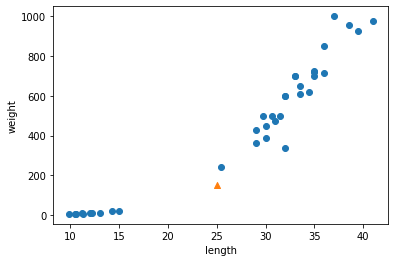

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length'); plt.ylabel('weight')
plt.show()

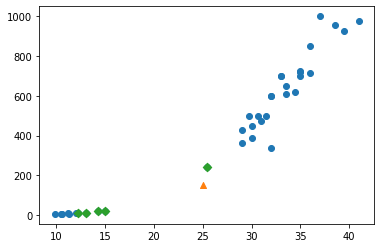

In [23]:
# 배열 인덱스 사용하기
distance , index = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25,150, marker = '^')
plt.scatter(train_input[index, 0], train_input[index, 1], marker = 'D')
plt.show()


In [25]:
print(train_input[index])
print(train_target[index])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


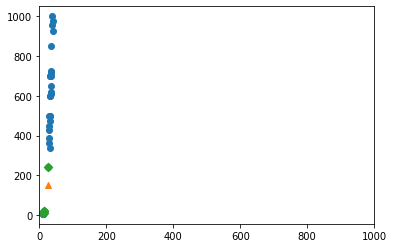

In [26]:
# 데이터 전처리 스케일링 하기
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25,150, marker = '^')
plt.scatter(train_input[index, 0], train_input[index, 1], marker = 'D')
plt.xlim(0,1000)
plt.show()


In [27]:
# 표준 점수: 각 데이터가 원점에서 몇 표준편차 만큼 떨어져 있는지를 나타낸다.

mean = np.mean(train_input, axis =0 )
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


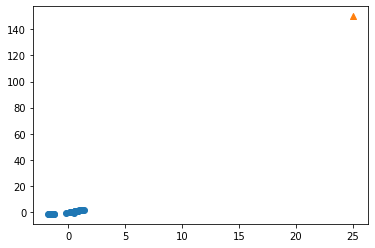

In [28]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker = '^')
plt.show()

[-0.23012627 -0.94060693]


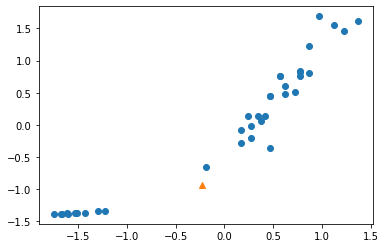

In [32]:
new = ([25, 150]- mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
print(new)
plt.scatter(new[0],new[1], marker = '^')
plt.show()

In [33]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [34]:
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

In [35]:
print(kn.predict([new]))

[1.]


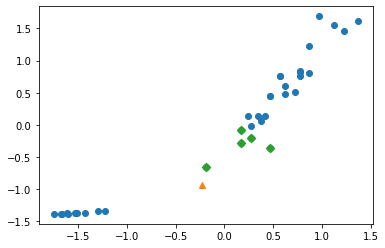

In [36]:
distance , index = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker = '^')
plt.scatter(train_scaled[index,0], train_scaled[index,1], marker = 'D')
plt.show()